<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/HW3_prb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#2a (without adding any weight)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load cancer dataset
from sklearn import datasets
dataset = datasets.load_breast_cancer()
X = dataset.data
Y = dataset.target
target_names = dataset.target_names

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report)

In [20]:
classifier = LogisticRegression(solver="liblinear", penalty="l2", C=1.0, max_iter=1000, random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [21]:
Y_pred = classifier.predict(X_test)

In [22]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[40,  2],
       [ 0, 72]])

In [23]:
#Evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0
F1 Score: 0.9863013698630136


Text(0.5, 427.9555555555555, 'Predicted label')

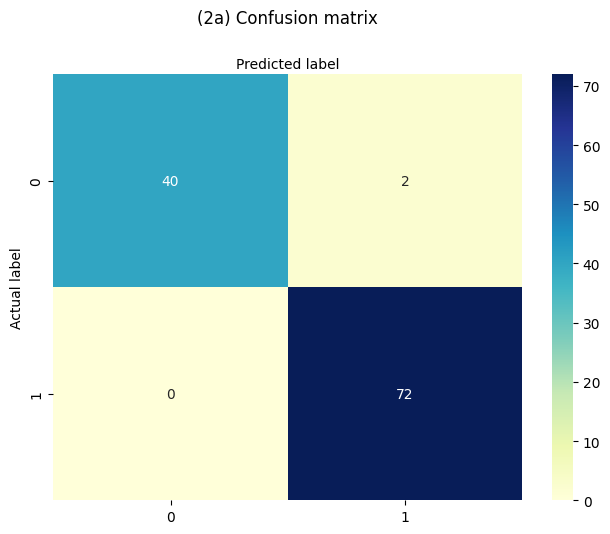

In [24]:
#Visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('(2a) Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
# 2b (adding weight penalty)

wp = X_train.shape[1] #number of parameters=30
C_penalized = 1.0 / wp

classifier_b = LogisticRegression(solver='liblinear', penalty='l2', C=C_penalized, random_state=0, max_iter=1000)
classifier_b.fit(X_train, Y_train)

Y_pred_b = classifier_b.predict(X_test)
cnf_matrix_b = confusion_matrix(Y_test, Y_pred_b)
cnf_matrix_b

array([[39,  3],
       [ 0, 72]])

In [26]:
print(f"\n=== (b) With weight penalty ")
print("Accuracy:",  metrics.accuracy_score(Y_test, Y_pred_b))
print("Precision:", metrics.precision_score(Y_test, Y_pred_b))
print("Recall:",    metrics.recall_score(Y_test, Y_pred_b))
print("F1 Score:",  metrics.f1_score(Y_test, Y_pred_b))


=== (b) With weight penalty 
Accuracy: 0.9736842105263158
Precision: 0.96
Recall: 1.0
F1 Score: 0.9795918367346939


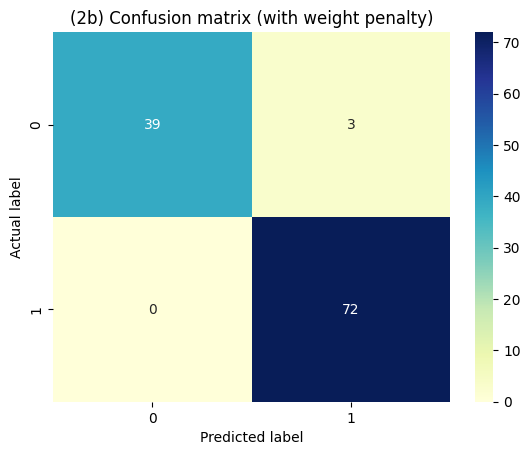

In [27]:
plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix_b), annot=True, cmap="YlGnBu", fmt='g')
plt.title('(2b) Confusion matrix (with weight penalty)');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')
plt.show()
